<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 


import numpy as np

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

Вывод данных.

In [3]:
data.sample(15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8797,8798,15630466,Maclean,797,France,Male,45,8.0,0.00,1,0,0,125110.02,0
8483,8484,15589949,Maclean,433,Spain,Male,34,9.0,152806.74,1,1,0,19687.99,0
9601,9602,15797692,Volkova,659,France,Female,33,7.0,89939.62,1,1,0,136540.09,0
1855,1856,15570601,Cheng,785,France,Female,47,9.0,122031.55,1,1,1,33823.50,1
1464,1465,15595067,Zhirov,637,Spain,Female,40,6.0,0.00,2,1,1,181610.60,0
5545,5546,15806709,Hao,609,Germany,Male,33,6.0,94126.67,1,0,0,93718.16,0
5908,5909,15641934,Manna,749,Spain,Female,46,9.0,66582.81,1,1,0,78753.12,1
749,750,15698839,Okwudilichukwu,460,Germany,Male,46,NaN,127559.97,2,1,1,126952.50,0
2863,2864,15659175,Severson,755,France,Female,43,9.0,0.00,2,1,0,18066.69,0
6481,6482,15664752,Jack,606,Germany,Male,39,8.0,136000.45,2,1,0,31708.53,0


**Признаки**
- RowNumber — индекс строки в данных (не ясно зачем он нужен, оставлю как есть)
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В этом столбце хранятся только целые значения в float типе данных, для экономии места изменю на int, так же только в этом столбце есть пропуски

А переименовать столбцы я не буду, они все названы в одном стиле

In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Никаких аномальных значений не выявленно

Теперь надо заняться пропусками, они есть только в 1 столбце. В данном случае можно заменить их просто средним или медианным значением, не прибегая к группировке данных

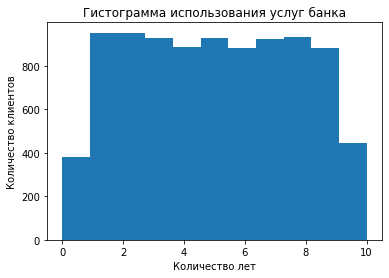

In [6]:
plt.hist(data['Tenure'], bins=11)
plt.xlabel('Количество лет')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма использования услуг банка')
plt.show()

Распределение тут похожу на нормальное, значит заполним средним значением

In [7]:
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

In [8]:
data.Tenure.value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Когда пропусков нет, удобно заменить тип данных где нужно

In [9]:
data['Tenure'] = data['Tenure'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Осталось посмотреть на наличие дубликатов

Явные:

In [11]:
data.duplicated().sum()

0

Не явные:

Проверка по совпадению фамилии

In [12]:
data['CustomerId'].duplicated().sum()

0

In [13]:
data[['Surname', 'Age', 'Gender']].duplicated().sum()


596

Это возможноные дубликаты, однако, буду придерживаться данным и признаку ID. Оставлю без изменений. Но показать на возможность должен

Теперь данные готовы к анализу

У нас явная задачи классификации. Перед обучением модели следует заняться подготовкой признаков

Тк у нас есть категориальные признаки, займемся преобразованием их в численные

Я буду использовать технику прямого кодрирования, тк я собираюсь найти лучшую модель из 3 - логистическая регрессия, дерево и случайный лес. для логистической регрессии нужно прямое кодирование, чтобы не было линейнозависых переменных и так она признаки вставляет в формулу. а для других моделей выше не важно, какая техника будет использована


Но перед этим я уберу столбцы с ID, фамилией и номером строки, они никак не помогут

In [14]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

**Создаю выборки**

In [15]:


target = data['Exited']
features = data.drop('Exited', axis=1)
features_train, features_new, target_train, target_new = train_test_split(
    features, target, test_size=0.5, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_new, target_new, test_size=0.5, random_state=12345)


encoder = OrdinalEncoder()
encoder.fit(features_train[['Gender', 'Geography']])


features_train[['Gender', 'Geography']] = encoder.transform(features_train[['Gender', 'Geography']])
features_valid[['Gender', 'Geography']] = encoder.transform(features_valid[['Gender', 'Geography']])
features_test[['Gender', 'Geography']] = encoder.transform(features_test[['Gender', 'Geography']])
print(features_train.head())
scaler = StandardScaler()

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
6331          629        1.0     1.0   35       8  112330.83              1   
8201          718        2.0     0.0   49      10   82321.88              1   
3109          850        1.0     0.0   47      10  134381.52              1   
4773          646        1.0     0.0   35       1  121952.75              2   
8881          744        0.0     1.0   29       1   43504.42              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
6331          1               1         91001.02  
8201          0               1         11144.40  
3109          0               0         26812.89  
4773          1               1        142839.82  
8881          1               1        119327.75  


/tmp/ipykernel_108/3678599840.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[['Gender', 'Geography']] = encoder.transform(features_train[['Gender', 'Geography']])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_108/3678599840.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [17]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None 
features_train.loc[:, numeric] = scaler.transform(features_train.loc[:, numeric])
features_valid.loc[:, numeric] = scaler.transform(features_valid.loc[:, numeric])
features_test.loc[:, numeric] = scaler.transform(features_test.loc[:, numeric])

# Масштабирование числовых признаков в обучающей выборке

display(features_train)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6331,-0.239180,1.0,1.0,-0.374637,1.091632,0.572035,-0.885763,1,1,-0.140281
8201,0.685393,2.0,0.0,0.953729,1.823289,0.089503,-0.885763,0,1,-1.526589
3109,2.056669,1.0,0.0,0.763962,1.823289,0.926601,-0.885763,0,0,-1.254584
4773,-0.062576,1.0,0.0,-0.374637,-1.469167,0.726751,0.844919,1,1,0.759638
8881,0.955493,0.0,1.0,-0.943937,-1.469167,-0.534666,-0.885763,1,1,0.351470
...,...,...,...,...,...,...,...,...,...,...
4478,-1.070256,0.0,1.0,-0.754170,-0.371682,-1.234200,0.844919,0,1,-1.274167
4094,-1.444241,0.0,1.0,-0.943937,1.823289,-1.234200,0.844919,0,1,-1.277120
3492,0.030920,0.0,0.0,0.574196,-0.005853,-0.312404,-0.885763,0,1,-0.898078
2177,0.155582,0.0,0.0,-1.418353,-0.371682,-1.234200,0.844919,0,1,-1.123991


## Исследование задачи

In [18]:

target_train[target_train == 1].count()

1016

In [19]:
target_train[target_train == 0].count()

3984

Виден диссбаланс классов. для начала обучу модели игнорируя его

Буду использовать три модели
- Дерево решений
- Случайный лес
- Логистическая регрессия.


Начну с решающего дерева и подбора ему гиперпараметра глубины

In [20]:
best_f1_score = 0
best_max_depth = 0

for max_depth in range(1, 21):  
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_max_depth = max_depth

print("Лучшая F1-мера:", best_f1_score)
print("Лучшее значение max_depth:", best_max_depth)
confusion_matrix(target_valid, predictions)

Лучшая F1-мера: 0.5264452644526445
Лучшее значение max_depth: 5


array([[1705,  287],
       [ 251,  257]])

0.52, мало, но это еще не все. Вдабаок вывел матрицу ошибок для сравнения с моделью учитывающей баланс классов

In [21]:
best_f1_score = 0
best_n_estimators = 0
best_max_depth = 0

for n_estimators in range(10, 101, 10):  
    for max_depth in range(1, 11):  
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print("Лучшая F1-мера:", best_f1_score)
print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина деревьев (max_depth):", best_max_depth)
confusion_matrix(target_valid, predictions)

Лучшая F1-мера: 0.5440414507772021
Лучшее количество деревьев (n_estimators): 90
Лучшая максимальная глубина деревьев (max_depth): 10


array([[1938,   54],
       [ 299,  209]])

В случаном лесе ситуация получше, но не сильно. FP намного меньше, но немного больше FN

Тут совсем ужас, буду держать внимание на лесе

Пора заняться баансом классов

**Итог**

Ожидаемо, при дисбалансе видим низкий показатель F-1 меры для моделей, несмотря на подбор гиперпараметров для разных моеделй и на масштабированные признаки для всего датафрейма. Accuracy я не смотрел, тк она плохо работает с несбалансированными классами. теперь нужно их сбалансировать.

## Борьба с дисбалансом

In [22]:

best_f1_score = 0
best_max_depth = 0

for max_depth in range(1, 21):
    model = DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    
    if f1 > best_f1_score:
        best_f1_score = f1
        best_max_depth = max_depth

print("Лучшая F1-мера:", best_f1_score)
print("Лучшее значение max_depth:", best_max_depth)
confusion_matrix(target_valid, predictions)



Лучшая F1-мера: 0.5421511627906976
Лучшее значение max_depth: 5


array([[1713,  279],
       [ 274,  234]])

Теперь дерево работает лучше, чем несбалансированный лес. FP упал, но PN поднялся, это понятно. они взаимосвязаный и не могут быть низкими вместе

In [23]:
best_f1_score = 0
best_n_estimators = 0
best_max_depth = 0

for n_estimators in range(10, 101, 10):  
    for max_depth in range(1, 11): 
        model = RandomForestClassifier(class_weight='balanced',n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print("Лучшая F1-мера:", best_f1_score)
print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина деревьев (max_depth):", best_max_depth)
confusion_matrix(target_valid, predictions)


Лучшая F1-мера: 0.5922920892494928
Лучшее количество деревьев (n_estimators): 100
Лучшая максимальная глубина деревьев (max_depth): 10


array([[1806,  186],
       [ 216,  292]])

Определенно снова фаворит. далеко не идеальная и не отличная точность, но требуют чуть меньше этой, так что подходит

Хорошо, попробую другие методы

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [25]:
from sklearn.utils import shuffle
features_upsampled, target_upsampled = upsample(features_train, target_train, 400)

# < напишите код здесь >
for n_estimators in range(10, 101, 10):  
    for max_depth in range(1, 11): 
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        
        if f1 > best_f1_score:
            best_f1_score = f1
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print("Лучшая F1-мера:", best_f1_score)
print("Лучшее количество деревьев (n_estimators):", best_n_estimators)
print("Лучшая максимальная глубина деревьев (max_depth):", best_max_depth)
confusion_matrix(target_valid, predictions)

Лучшая F1-мера: 0.5922920892494928
Лучшее количество деревьев (n_estimators): 100
Лучшая максимальная глубина деревьев (max_depth): 10


array([[ 350, 1642],
       [  19,  489]])

In [26]:
target_upsampled[target_upsampled == 1].count()

406400

In [27]:
target_upsampled[target_upsampled == 0].count()

3984

## Тестирование модели

In [28]:
forest = RandomForestClassifier(class_weight='balanced',n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=12345)
forest.fit(features_train, target_train)
predictions = forest.predict(features_test)
f1 = f1_score(target_test, predictions)
        
print("Лучшая F1-мера:", f1)

confusion_matrix(target_test, predictions)


Лучшая F1-мера: 0.6195761856710394


array([[1816,  171],
       [ 206,  307]])

Да, то что нужно, лес справился. потребовалось многое сделать для достижения результата, но в итоге получили ожидаемый результат

**Итог**

- Обнаружил пропуски в признаке Tenure и заполнил средним, тк данные расположены примерно нормально
- Заменил тип данных в этом столбце для экономии памяти
- Масштабировал признаки, чтобы не сбивать модели разным диапазоном разных признаков 
- Проверил точность моделей с помощью F-1 для несбалансированных классов, результат ожидаемо плох
- Сбалансировал классы, для повышения точности модели
- Подобрал гиперпарамтры для повышения точности модели
- На тестовой выборе добился требуемого результата с помощью модели случайного леса с гиперпараметрами - глубина 8 и со 100 деревьями